In [110]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
dfprcfield = pd.DataFrame({
      "rprs_mrkt_kor_name": {
        "한글명": "대표 시장 한글 명",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": ""
      },
      "new_hgpr_lwpr_cls_code": {
        "한글명": "신 고가 저가 구분 코드",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": "특정 경우에만 데이터 출력"
      },
      "mxpr_llam_cls_code": {
        "한글명": "상하한가 구분 코드",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": "특정 경우에만 데이터 출력"
      },
      "crdt_able_yn": {
        "한글명": "신용 가능 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "stck_mxpr": {
        "한글명": "주식 상한가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "elw_pblc_yn": {
        "한글명": "ELW 발행 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "prdy_clpr_vrss_oprc_rate": {
        "한글명": "전일 종가 대비 시가2 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "crdt_rate": {
        "한글명": "신용 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "marg_rate": {
        "한글명": "증거금 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "lwpr_vrss_prpr": {
        "한글명": "최저가 대비 현재가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "lwpr_vrss_prpr_sign": {
        "한글명": "최저가 대비 현재가 부호",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "prdy_clpr_vrss_lwpr_rate": {
        "한글명": "전일 종가 대비 최저가 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "stck_lwpr": {
        "한글명": "주식 최저가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "hgpr_vrss_prpr": {
        "한글명": "최고가 대비 현재가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "hgpr_vrss_prpr_sign": {
        "한글명": "최고가 대비 현재가 부호",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "prdy_clpr_vrss_hgpr_rate": {
        "한글명": "전일 종가 대비 최고가 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "stck_hgpr": {
        "한글명": "주식 최고가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "oprc_vrss_prpr": {
        "한글명": "시가2 대비 현재가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "oprc_vrss_prpr_sign": {
        "한글명": "시가2 대비 현재가 부호",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "mang_issu_yn": {
        "한글명": "관리 종목 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "divi_app_cls_code": {
        "한글명": "동시호가배분처리코드",
        "Type": "String",
        "Required": "Y",
        "Length": 2,
        "Description": "11:매수상한배분 12:매수하한배분 13: 매도상한배분 14:매도하한배분"
      },
      "short_over_yn": {
        "한글명": "단기과열여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "mrkt_warn_cls_code": {
        "한글명": "시장경고코드",
        "Type": "String",
        "Required": "Y",
        "Length": 2,
        "Description": "00: 없음 01: 투자주의 02:투자경고 03:투자위험"
      },
      "invt_caful_yn": {
        "한글명": "투자유의여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "stange_runup_yn": {
        "한글명": "이상급등여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "ssts_hot_yn": {
        "한글명": "공매도과열 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "low_current_yn": {
        "한글명": "저유동성 종목 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "vi_cls_code": {
        "한글명": "VI적용구분코드",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "short_over_cls_code": {
        "한글명": "단기과열구분코드",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "stck_llam": {
        "한글명": "주식 하한가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "new_lstn_cls_name": {
        "한글명": "신규 상장 구분 명",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": ""
      },
      "vlnt_deal_cls_name": {
        "한글명": "임의 매매 구분 명",
        "Type": "String",
        "Required": "Y",
        "Length": 16,
        "Description": ""
      },
      "flng_cls_name": {
        "한글명": "락 구분 이름",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": "특정 경우에만 데이터 출력"
      },
      "revl_issu_reas_name": {
        "한글명": "재평가 종목 사유 명",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": "특정 경우에만 데이터 출력"
      },
      "mrkt_warn_cls_name": {
        "한글명": "시장 경고 구분 명",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": "\"투자환기\" / \"투자경고\""
      },
      "stck_sdpr": {
        "한글명": "주식 기준가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "bstp_cls_code": {
        "한글명": "업종 구분 코드",
        "Type": "String",
        "Required": "Y",
        "Length": 4,
        "Description": ""
      },
      "stck_prdy_clpr": {
        "한글명": "주식 전일 종가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "insn_pbnt_yn": {
        "한글명": "불성실 공시 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "fcam_mod_cls_name": {
        "한글명": "액면가 변경 구분 명",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": "특정 경우에만 데이터 출력"
      },
      "stck_prpr": {
        "한글명": "주식 현재가",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "prdy_vrss": {
        "한글명": "전일 대비",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "prdy_vrss_sign": {
        "한글명": "전일 대비 부호",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "prdy_ctrt": {
        "한글명": "전일 대비율",
        "Type": "String",
        "Required": "Y",
        "Length": 82,
        "Description": ""
      },
      "acml_tr_pbmn": {
        "한글명": "누적 거래 대금",
        "Type": "String",
        "Required": "Y",
        "Length": 18,
        "Description": ""
      },
      "acml_vol": {
        "한글명": "누적 거래량",
        "Type": "String",
        "Required": "Y",
        "Length": 18,
        "Description": ""
      },
      "prdy_vrss_vol_rate": {
        "한글명": "전일 대비 거래량 비율",
        "Type": "String",
        "Required": "Y",
        "Length": 84,
        "Description": ""
      },
      "bstp_kor_isnm": {
        "한글명": "업종 한글 종목명",
        "Type": "String",
        "Required": "Y",
        "Length": 40,
        "Description": "※ 거래소 정보로 특정 종목은 업종구분이 없어 데이터 미회신"
      },
      "sltr_yn": {
        "한글명": "정리매매 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "trht_yn": {
        "한글명": "거래정지 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "oprc_rang_cont_yn": {
        "한글명": "시가 범위 연장 여부",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "vlnt_fin_cls_code": {
        "한글명": "임의 종료 구분 코드",
        "Type": "String",
        "Required": "Y",
        "Length": 1,
        "Description": ""
      },
      "stck_oprc": {
        "한글명": "주식 시가2",
        "Type": "String",
        "Required": "Y",
        "Length": 10,
        "Description": ""
      },
      "prdy_vol": {
        "한글명": "전일 거래량",
        "Type": "String",
        "Required": "Y",
        "Length": 18,
        "Description": ""
      }
}).T.reset_index()[['index', '한글명']]
dfprcfield.columns = ['code', 'name']

In [3]:
dfprcfield.sort_values(by='code')

,code,name
44,acml_tr_pbmn,누적 거래 대금
45,acml_vol,누적 거래량
36,bstp_cls_code,업종 구분 코드
47,bstp_kor_isnm,업종 한글 종목명
3,crdt_able_yn,신용 가능 여부
7,crdt_rate,신용 비율
20,divi_app_cls_code,동시호가배분처리코드
5,elw_pblc_yn,ELW 발행 여부
39,fcam_mod_cls_name,액면가 변경 구분 명
32,flng_cls_name,락 구분 이름


In [4]:
data_dir = os.path.join(os.path.expanduser('~'), 'data','ofij')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# files
kospicode_filename = 'kospi_code.csv'
stinfo_filename = os.path.join(data_dir, 'stock_info.feather')
stprc_filename = os.path.join(data_dir, 'stock_prices.feather')


dfstcode = pd.read_csv(kospicode_filename)
dfstinfo = pd.read_feather(stinfo_filename)
dfstprc = pd.read_feather(stprc_filename)

df = dfstinfo.merge(dfstcode, how='left', on='단축코드')

dfmeta = pd.DataFrame({
    '한글명': df['한글명'],  # Company Name
    '표준코드': df['표준코드'],  # Standard Product Code
    '단축코드': df['단축코드'],  # Short Stock Code
    '상장일자': pd.to_datetime(df['상장일자'], format='%Y%m%d'),  # Listed Date
    '시장구분': df['KOSPI'].apply(lambda x: 'KOSPI' if x == 'Y' else 'Other'),  # Market (KOSPI or Others)
    '업종대분류': df['idx_bztp_lcls_cd_name'],  # Industry Size Category
    '업종중분류': df['idx_bztp_mcls_cd_name'],  # Industry Medium Category
    '표준산업분류': df['std_idst_clsf_cd_name'],  # Industry Detailed Category
    '액면가': df['액면가'],  # Face value
    '시가총액(억 원)': df['시가총액'],  # Market Cap in Hundred-Million KRW
    '매출액(억 원)': df['매출액'],  # Sales
    '영업이익(억 원)': df['영업이익'],  # Operating Profit
    '당기순이익(억 원)': df['당기순이익'],  # Net Profit
    'ROE(%)': df['ROE'],  # Return on Equity
    '전일종가(원)': df['기준가'],  # Previous Closing Price 
    '신용가능': df['신용가능'].apply(lambda x: True if x == 'Y' else False),  # Credit investment possibility
    '증거금비율(%)': df['증거금비율'],  # Margin Rate Requirement
    'KRX바이오': df['KRX바이오'].apply(lambda x: True if x == 'Y' else False),  # Part of KRX Bio
    '관리종목': df['관리종목'].apply(lambda x: True if x == 'Y' else False),  # Admin-Managed Issue 
    '거래정지': df['거래정지'].apply(lambda x: True if x == 'Y' else False),  # Trading Suspension
    '불성실공시': df['불성실공시'].apply(lambda x: True if x == 'Y' else False),  # Unfaithful Disclosure
    '이상급등': df['이상급등'].apply(lambda x: True if x == 'Y' else False),  # Sudden Price Surge
}).reset_index(drop=True)



In [5]:
dfstprc[dfstprc['STOCK_CODE'] == '005930'].groupby('PERIOD_CODE').agg({
    'stck_bsop_date': ['min','max']
})

stck_bsop_date          
                       min       max
PERIOD_CODE                         
D                 20250311  20250421
M                 20221130  20250421
W                 20240930  20250421

In [6]:
# dfhmm = dfstprc[(dfstprc['STOCK_CODE'] == '011200') & (dfstprc['PERIOD_CODE'] == 'D')].set_index('stck_bsop_date') #.acml_vol
# dfhmm.index = pd.to_datetime(dfhmm.index, format='%Y%m%d')
# dfhmm.sort_index(inplace=True)
# dfhmm.drop(columns=['STOCK_CODE', 'PERIOD_CODE'], inplace=True)
# dfhmm = dfhmm.astype(float)
# dfhmm[['acml_vol']].plot()

### price change correlation

In [7]:
dfprc = dfstprc[dfstprc['PERIOD_CODE'] == 'D'][['stck_bsop_date', 'STOCK_CODE', 'stck_clpr']].pivot(index='stck_bsop_date', columns='STOCK_CODE', values='stck_clpr').astype(float)

#### Dynamic Time Wraping (DTW)

In [125]:
from dtaidistance import dtw
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

In [108]:
series = dfprc.T.values  # shape (num_series, num_points)
n = len(series)
distance_matrix = np.zeros((n, n))
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        dist = dtw.distance(series[i], series[j])
        distance_matrix[i, j] = distance_matrix[j, i] = dist

100%|██████████| 932/932 [05:13<00:00,  2.97it/s]


In [111]:
dfdtwres = pd.DataFrame(distance_matrix)
# check nan values in dfdtwres and print its index
# nanidx = dfdtwres[dfdtwres[0].isna()].index
# # remove nanidx from dfdtwres index and columns
# dfdtwres.drop(index=nanidx, inplace=True)
# dfdtwres.drop(columns=nanidx, inplace=True)

In [112]:
minres = []
for i, rec in dfdtwres.iterrows():
    rec2 = rec.dropna().nsmallest(2)
    min_idx = rec2.index[-1]
    min_val = rec2.iloc[-1]
    minres.append((i, min_idx, min_val))

In [113]:
dfminres = pd.DataFrame(minres)
dfminres.columns = ['idx1', 'idx2', 'dist']


In [119]:
dfprc.head(2)

STOCK_CODE,000020,000040,000050,000070,000075,000080,000087,000100,000105,000120,...,462520,462870,465770,475150,475560,480370,484870,487570,489790,499790
stck_bsop_date,,,,,,,,,,,,,,,,,,,,,
20250311,6200.0,396.0,6540.0,60200.0,58900.0,19050.0,15130.0,119900.0,106000.0,94100.0,...,14410.0,54500.0,8510.0,14500.0,28500.0,NaN,86100.0,30250.0,49350.0,19330.0
20250312,6220.0,395.0,6540.0,60100.0,58600.0,19050.0,15170.0,118800.0,105600.0,92800.0,...,14400.0,55300.0,8300.0,14640.0,28650.0,NaN,77000.0,30750.0,53900.0,19420.0


In [122]:
dfprc.columns = [f"{dfmeta[dfmeta.단축코드 == x]['한글명'].iloc[0]}({x})" for x in dfprc.columns]

In [131]:
dfminres['idx1name'] = ''
dfminres['idx2name'] = ''
for i, rec in dfminres.iterrows():
    dfminres.loc[i, 'idx1name'] = dfprc.columns[rec['idx1']]
    dfminres.loc[i, 'idx2name'] = dfprc.columns[rec['idx2']]

In [132]:
dfminres[dfminres['dist'] > 0.1].sort_values('dist').head(10)

,idx1,idx2,dist,idx1name,idx2name
91,91,131,36.221541,SK증권(001510),SH에너지화학(002360)
131,131,91,36.221541,SH에너지화학(002360),SK증권(001510)
770,770,485,46.486557,KC코트렐(119650),에이엔피(015260)
485,485,770,46.486557,에이엔피(015260),KC코트렐(119650)
395,395,212,48.176758,플레이그램(009810),SG세계물산(004060)
212,212,395,48.176758,SG세계물산(004060),플레이그램(009810)
246,246,306,54.506880,티웨이홀딩스(004870),한국전자홀딩스(006200)
306,306,246,54.506880,한국전자홀딩스(006200),티웨이홀딩스(004870)
266,266,78,65.444633,온타이드(005320),상상인증권(001290)
78,78,266,65.444633,상상인증권(001290),온타이드(005320)


<Axes: xlabel='stck_bsop_date'>

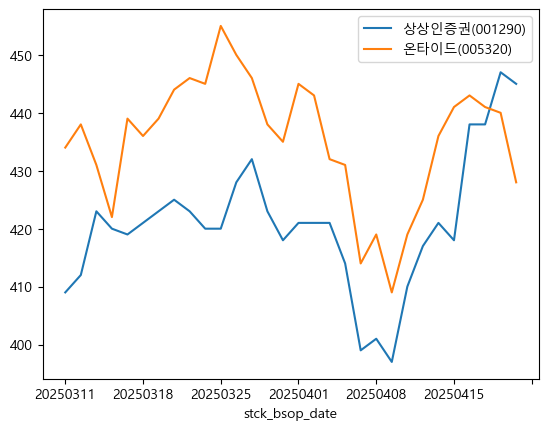

In [135]:
dfprc.iloc[:, [78,266]].plot()


In [34]:
dfdtwres.shape

(930, 930)

#### Clustering

In [15]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

In [36]:
condensed_dist = squareform(dfdtwres.to_numpy())

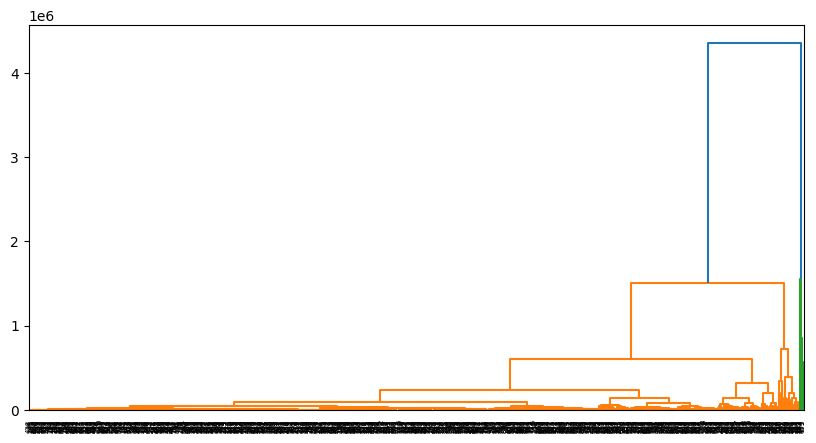

In [38]:
# linkage using the condensed distance
Z = linkage(condensed_dist, method='average')  # method can be 'ward', 'average', etc.

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=dfdtwres.index)
plt.show()

In [42]:
Zdf = pd.DataFrame(
    Z,
    columns=['Cluster1', 'Cluster2', 'Distance', 'SampleCount']
)

In [43]:
Zdf

,Cluster1,Cluster2,Distance,SampleCount
0,91.0,131.0,3.622154e+01,2.0
1,485.0,769.0,4.648656e+01,2.0
2,212.0,395.0,4.817676e+01,2.0
3,246.0,306.0,5.450688e+01,2.0
4,930.0,931.0,5.715788e+01,4.0
...,...,...,...,...
924,1849.0,1851.0,7.160474e+05,26.0
925,174.0,1852.0,8.475836e+05,4.0
926,1853.0,1854.0,1.506249e+06,925.0
927,820.0,1855.0,1.553386e+06,5.0
